In [1]:
from my_library.algorithms.hierarchical import hierarchical as hier

In [2]:
hi=hier.Hierarchical('samdata_preprocessed.csv')

In [3]:
hi.get_shape()

(10000, 55)

In [4]:
folds = 5
params_grid = {"linkage": ["ward", "complete", "average", "single"],
               "n_clusters": list(range(2, 10)),
               "affinity": ["euclidean", "l1", "l2", "manhattan", "cosine"]}

In [5]:
a, b, c = hi.randomizedSearchCV_hierarchical(params_grid, folds)

In [6]:
linkage = b['linkage']
n_clusters = b['n_clusters']
affinity = b['affinity']

In [7]:
print("recommended parameters: ", linkage, n_clusters, affinity)

recommended parameters:  average 3 euclidean


In [8]:
hi.get_training_history(c)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_clusters,param_linkage,param_affinity,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.057652,0.002611,0.009630,0.000506,6,single,l2,"{'n_clusters': 6, 'linkage': 'single', 'affini...",0.222474,0.407381,0.084963,0.342829,0.195740,0.250678,0.113422,7
1,0.052631,0.000721,0.009938,0.000606,5,single,cosine,"{'n_clusters': 5, 'linkage': 'single', 'affini...",0.134155,0.166670,0.132463,0.182964,0.234066,0.170064,0.037356,8
2,0.076932,0.003532,0.009992,0.000888,9,average,l2,"{'n_clusters': 9, 'linkage': 'average', 'affin...",0.531917,0.559501,0.532689,0.567181,0.557309,0.549719,0.014596,4
3,0.002202,0.000398,0.000000,0.000000,8,ward,l1,"{'n_clusters': 8, 'linkage': 'ward', 'affinity...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,10
4,0.078505,0.004824,0.013874,0.002035,3,average,euclidean,"{'n_clusters': 3, 'linkage': 'average', 'affin...",0.515593,0.580388,0.595550,0.582371,0.579372,0.570655,0.028141,1
5,0.072558,0.001719,0.010222,0.000463,9,average,manhattan,"{'n_clusters': 9, 'linkage': 'average', 'affin...",0.533765,0.554985,0.525802,0.570990,0.545323,0.546173,0.015894,5
6,0.061583,0.005717,0.010844,0.003107,8,single,manhattan,"{'n_clusters': 8, 'linkage': 'single', 'affini...",0.392517,0.348568,0.073675,0.257183,0.287656,0.271920,0.109713,6
7,0.077847,0.002081,0.011821,0.001640,4,average,euclidean,"{'n_clusters': 4, 'linkage': 'average', 'affin...",0.542117,0.590522,0.551153,0.537880,0.546559,0.553646,0.018962,2
8,0.054533,0.001721,0.009692,0.000797,6,single,cosine,"{'n_clusters': 6, 'linkage': 'single', 'affini...",0.137323,0.169921,0.135616,0.174106,0.232025,0.169798,0.034968,9
9,0.077635,0.004208,0.010425,0.000506,7,average,l2,"{'n_clusters': 7, 'linkage': 'average', 'affin...",0.558226,0.566007,0.563662,0.549342,0.519092,0.551266,0.017078,3


In [9]:
clusters = hi.hierarchical(n_clusters, linkage, affinity)

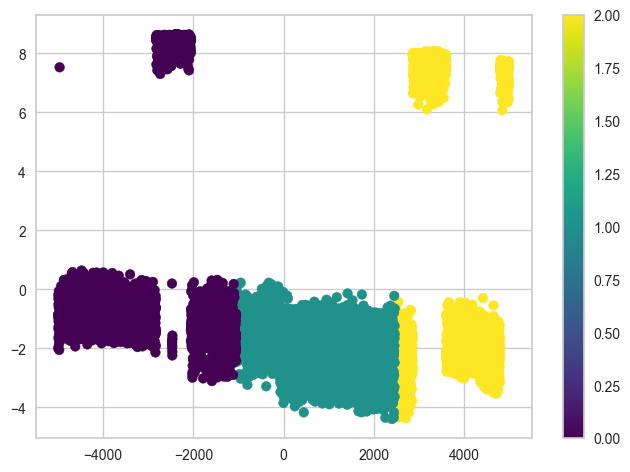

In [10]:
hi.scatter_plot(hi.pca(clusters))

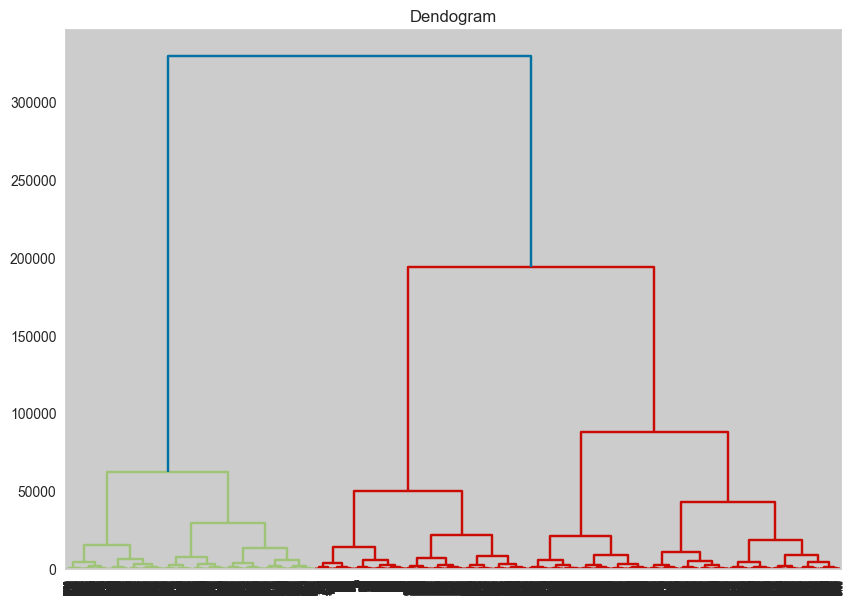

In [11]:
hi.dendogram()

In [12]:
hi.get_silhouette_score(clusters)

0.5795361498173622

In [13]:
hi.get_davies_bouldin_score(clusters)

0.5000606451252291

In [14]:
hi.get_cluster_centers(clusters)

,Unnamed: 0,spclty_visit_cnt_processed,ucc_mcable_visit_count_processed,srv_copay_amt_processed,aetna_num_children_modif_processed,strat_score_value_processed,ucc_visit_cnt_processed,first_pulse_processed,pcp_visit_cnt_processed,age_nbr_processed,op_rehab_visit_cnt_processed,final_future_tenure_processed,hosop_lab_visit_cnt_processed,income_processed,hosop_rad_visit_cnt_processed,op_rehab_allowed_amt_processed,final_total_tenure_processed,medical_allowed_pmpm_processed,rx_mths_processed,complex_chronic_common_flag_processed,relationship_processed,active_medical_ind_ind,hyc_missing_ind,hyc_ind,a2020_rx_ind_ind,cvs_rx_inrange_ind_ind,marital_ind,ctd_missing_ind,dep_missing_ind,alg_missing_ind,active_dental_ind_ind,cvs_mc_inrange_ind_ind,a2020_medicare_ind_ind,high_pulse_missing_ind,high_pulse_ind,active_pharmacy_ind_ind,active_medicare_ind_ind,hyp_missing_ind,hyp_ind,cvs_hh_inrange_ind_ind,dia_missing_ind,a2020_dental_ind_ind,lbp_missing_ind,obe_missing_ind,anx_missing_ind,ngd_missing_ind,ngd_ind,pcp_flag_ind,gender_cd_ind,urbsubr_R,urbsubr_S,urbsubr_U,lob_CFI,lob_CSI,lob_ME,cluster
0,8025.500000,-0.241947,0.065852,-0.194287,0.495034,-0.586730,0.053888,-0.508606,-0.150024,-0.802993,0.166855,-0.118765,-0.192141,-0.057085,-0.213258,0.228818,-0.114956,-0.168051,-0.119362,0.322939,-0.709514,-0.016988,0.061200,-0.489869,-0.119694,0.036687,-0.040095,0.061200,0.061200,0.061200,0.063187,0.011611,-0.350865,0.061200,-0.279040,-0.207920,-0.327194,0.061200,-0.505330,-0.013768,0.061200,-0.032462,0.061200,0.061200,0.061200,0.061200,-0.253208,0.136272,0.043899,-0.025787,-0.028670,0.052594,-0.015275,0.294977,-0.350681,0
1,4293.499716,0.193673,-0.056321,0.204896,-0.485296,0.402588,-0.065749,0.334005,0.179288,0.638532,-0.130999,0.167083,0.177715,-0.065903,0.176397,-0.166332,0.077661,0.111496,0.221526,0.089851,-0.071237,-0.028132,-0.453371,0.556609,0.222069,-0.355389,0.213451,-0.453371,-0.453371,-0.453371,-0.071391,0.147788,0.570119,-0.453371,0.110594,0.340741,0.517459,-0.453371,0.563988,-0.187128,-0.453371,0.097813,-0.453371,-0.453371,-0.453371,-0.453371,0.274606,-0.299143,0.041676,0.030005,0.004825,-0.035309,-0.048947,-0.425545,0.569760,1
2,1267.500394,0.108143,-0.024432,0.018387,-0.097829,0.355249,0.007266,0.328711,-0.015016,0.364802,-0.078135,-0.046759,0.052731,0.180239,0.087434,-0.125611,0.071290,0.107037,-0.121310,-0.627318,1.203324,0.065449,0.533294,-0.009084,-0.121547,0.435610,-0.233518,0.533294,0.533294,0.533294,0.000611,-0.222974,-0.244213,0.533294,0.281072,-0.148730,-0.208053,0.533294,0.004757,0.280875,0.533294,-0.085076,0.533294,0.533294,0.533294,0.533294,0.013466,0.202596,-0.126121,-0.001456,0.037942,-0.032924,0.091642,0.130775,-0.244000,2


In [15]:
hi.get_cluster_sizes(clusters)

0    3948
1    3516
2    2536
dtype: int64